# **House Sales Project**
#  1. Introduction
#  1.1. Scenario
In this project, as a Data Analyst working at a Real Estate Investment Trust, I am tasked with determining the market price of a house given a set of features. The Trust would like to start investing in Residential real estate.  This will be done by analyzing and predicting housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on.
# 1.2. The Data
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


# 2. Data Analysis

1. Importing Libraries.
Before anything, we will start by importing all the needed libraries for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

2. Import the data set

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

We will use the <code>head</code> method to verify if the loaded was loaded properly

In [3]:
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


As seen above, the data was loaded properly.

Now we need to check the data types

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We can also check the statistical summary of the dataframe using the <code>describe</code> method.

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2.1. Data Wrangling

**Task 1 : Drop unneeded columns** 

For the sake of this project columns <code>"id"</code> and <code>"Unnamed: 0"</code> are not needed, so we need to drop them.

In [6]:
df.drop(["id","Unnamed: 0"],axis = 1, inplace = True)

Let's check if the columns were droped

In [7]:
print(df.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


As seen above, the columns were indeed dropped.

Let's check if there are missing values in the data frame.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

As seen above, we can see that the columns <code>"bedrooms</code> and <code>"bathrooms"</code> have missing values; they respectively 21600 and 21603 values/entries/rows instead of 21613.   
We can double check this by verifying the number of missing values in those columns if there are any.

In [9]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


As stated above, there are indeed missing values in these columns.

**Task 2: Replace the missing values**

The missing values in both columns will be replaced by their mean

In [10]:
#For "bedrooms" (We first calculate/get the mean of the column, then we replace the missing values by it.)
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

#For "bathrooms"
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Let's check if the missing values have all been replaced.

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


As seen above, all the missing values have been replaced.

**Task 3: Determine/find the number of houses with unique floor values**

To determine this, we will use the <code>value_count</code> method.

In [12]:
df["floors"].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


**Task 4: Determine the nature(positive or negative) of the correlation between "price" and "sqft_above**

This will be done using function <code>regplot</code> of the seaborn library

<Axes: xlabel='sqft_above', ylabel='price'>

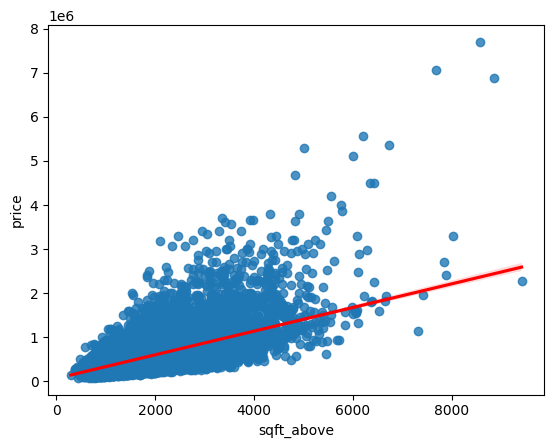

In [13]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})

The plot shows that the correlation between <code>"sqft_above"</code> and <code>"price"</code> is positive

Let's verify this as well as the correlation between <code>"price"</code> and the other featutes in the data frame using the Panda method <code>corr()</code> .

Before doing that, let's drop the column <code>"date"</code> as it is coded as having categorical data and that will prevent the <code>corr()</code> function to run.

In [14]:
df.drop(["date"],axis = 1, inplace = True)
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


Now we can run our <code>corr()</code> function.

In [15]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

From the result above(0.605567), we can confirm that the correlation between <code>"price"</code> and <code>"sqft_above"</code> is positive. This suggests that as the living area or the area above ground increases, the house price tends to increase significantly.

We can aslo highlight the negative correlation between <code>"price"</code> and <code>"zip_code"</code> (-0.053203) which is quite weak and suggest a very minimal relationship between zip code and house price.

**Task 5: Fit a Linear Regression Model to predict "price" using the longitude feature <code>"long"</code>**

We will determine the coeffiecient R^2(R-squared) as well to measure how well the linear regression data fits well the data.

In [16]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

The result shows that the R-squared value is 0.00046769430149007363,which is very close to 0. This indicates that the linear regression model built using the 'long' feature as the predictor variable (X) does not explain much of the variance in the 'price' target variable (Y).

An R-squared value closer to 1 indicates that the model explains a larger proportion of the variance in the dependent variable around its mean. However, an R-squared value of 0 or close to 0 suggests that the model does not explain much of the variance and may not be a good fit for the data.

In our case, the 'long' feature alone might not be a strong predictor of the 'price' variable, or a linear relationship might not exist between these two variables, leading to a very low R-squared value.

**Task 6: Fit a Linear Regression Model to predict "price" using the longitude feature <code>"sqft_living"</code>**

In [17]:
#Y remains the same("price")
X = df[['sqft_living']]
lm2 = LinearRegression()
lm2.fit(X,Y)
lm2.score(X, Y)

0.4928532179037931

The result show an R-squared of approximately 0.49 which means that the linear regression model explains roughly 49% of the variance in the 'price' variable based on the 'sqft_living' variable alone.

It implies that almost half of the variability in the house prices can be explained by the square footage of the living area ('sqft_living') using this linear model. While an R-squared of 0.49 is not extremely high, it still indicates a moderate level of predictability or correlation between 'sqft_living' and 'price'.

But it's important to underline that R-squared alone might not provide a complete picture, and other factors could significantly impact house prices. It's essential to consider multiple variables and possibly use more complex models for a more comprehensive understanding of the relationships between predictors and the target variable.

**Task 7: Fit a linear regression model to predict the <code>'price'</code> using the list of features:**

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]   

In [18]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

#Y remains the same
Z = df[features]
lm.fit(Z, Y)
lm.score(Z, Y)

0.6576862276276761

Compared result we got using <code>"sqft_living"</code> feature only(0.49), we can see that the coefficient has improved a lot (0.657) now that we have include multiple features to get a multiple linear regression.

In a multiple linear regression model, each coefficient represents the estimated change in the dependent variable when the respective independent variable changes by one unit, assuming all other variables remain constant.

Therefore, for example, a coefficient of 0.657 for a feature like 'bedrooms' would mean that, all else being equal, a one-unit increase in the number of bedrooms is associated with an estimated 0.657 unit increase in the 'price' of the house.

Here it's important to note that while the coefficient values provide insight into the strength and direction of the relationship between each feature and the 'price', their interpretation should consider the context of the dataset and the assumptions of the linear regression model. Additionally, the coefficient alone doesn't provide information about the statistical significance or causation between variables, which might require further analysis or hypothesis testing.

**Task 8: Predict <code>"price"</code> using the list <code>features</code> along with other elements such as <code>'scale'</code> and <code>'polynomial'</code>**

We will start by creating a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [19]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Then using the list, we will create a pipeline object to predict the <code>'price'</code>, and then fit the object using the features in the list features. We will aslo calculate the coefficient R^2 to measure how well the model fits the data.

In [20]:
#We start by importing r2_score to define it so that it can work in the function.
from sklearn.metrics import r2_score

pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.7513409118896031


**Task 9: Create and fit a Ridge regression object using training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.**

We will start by spliting the data into training and testing sets.
To do so, we will import the appropriate mudules scikit-learn first.

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Now let's fit the ridge regression.

In [23]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6478759163939113


**Task 10: Perform a second order polynomial transform on both the training data and testing data.**

We will first create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and  then calculate the R^2 utilising the test data provided

In [24]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
ridge = Ridge(alpha=0.1) 
ridge.fit(x_train_poly, y_train) 
y_pred = ridge.predict(x_test_poly)
print(r2_score(y_test, y_pred))

0.700274428859574


# **3. Conclusion**

If we were to base ourself on the coefficient only, the model that fits better the data and consequently will be the best to use to predict "price" is the <code>Pipeline</code> model using the <code>'scale'</code>, the <code>'polynomial'</code> and the <code>LinearRegression()</code> as it has the biggest coefficient. But as stated earlier, the coefficient alone is not enough to determine the best model, further analysis might be needed.